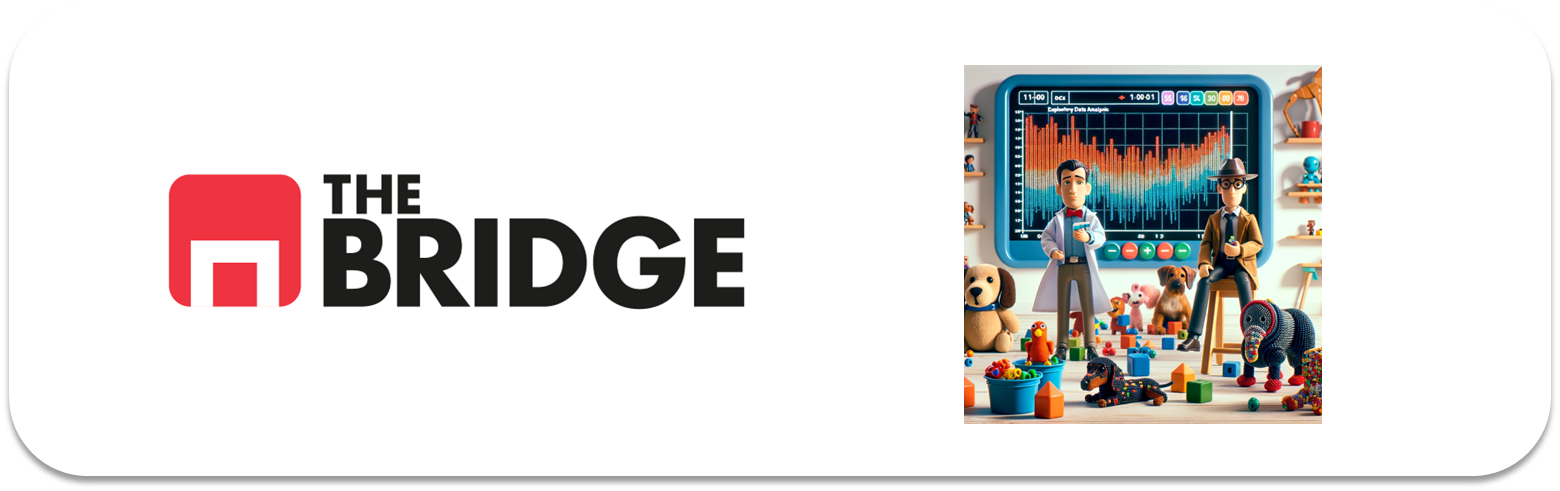

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

In [2]:
from scipy.stats import pearsonr

from scipy import stats

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [5]:
df_titanic2 = df_titanic.drop(columns=["deck","survived","embarked","pclass"]).copy()

In [7]:
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [8]:
df_titanic2.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [9]:
df_titanic2["family_members"] = df_titanic2["sibsp"] + df_titanic2["parch"]

In [11]:
df_titanic3 = df_titanic2.drop(columns=["sibsp","parch"]).copy()
df_titanic3.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [13]:
embark_town_mode = df_titanic3["embark_town"].mode()[0]

In [14]:
df_titanic4 = df_titanic3.copy()

In [15]:
df_titanic4["embark_town"] = df_titanic4["embark_town"].fillna(embark_town_mode)
df_titanic4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [29]:
mean_age  = df_titanic4.groupby("who")["age"].mean()
mean_age

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [25]:
for valor in df_titanic4["who"].unique():
    df_titanic4.loc[(df_titanic4["age"].isna()) & (df_titanic4["who"] == valor), "age"] = mean_age[valor]

In [28]:
df_titanic4.age.isna().sum()

np.int64(0)

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [36]:
columnas = df_titanic4.columns
columnas

Index(['sex', 'age', 'fare', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'family_members'],
      dtype='object')

In [34]:
columnas_numericas = list(df_titanic4.describe())

columnas_numericas

['age', 'fare', 'family_members']

In [ ]:
columnas_categoricas = list(set(columnas) - set(columnas_numericas))
columnas_categoricas

['who', 'embark_town', 'sex', 'alone', 'class', 'adult_male', 'alive']

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

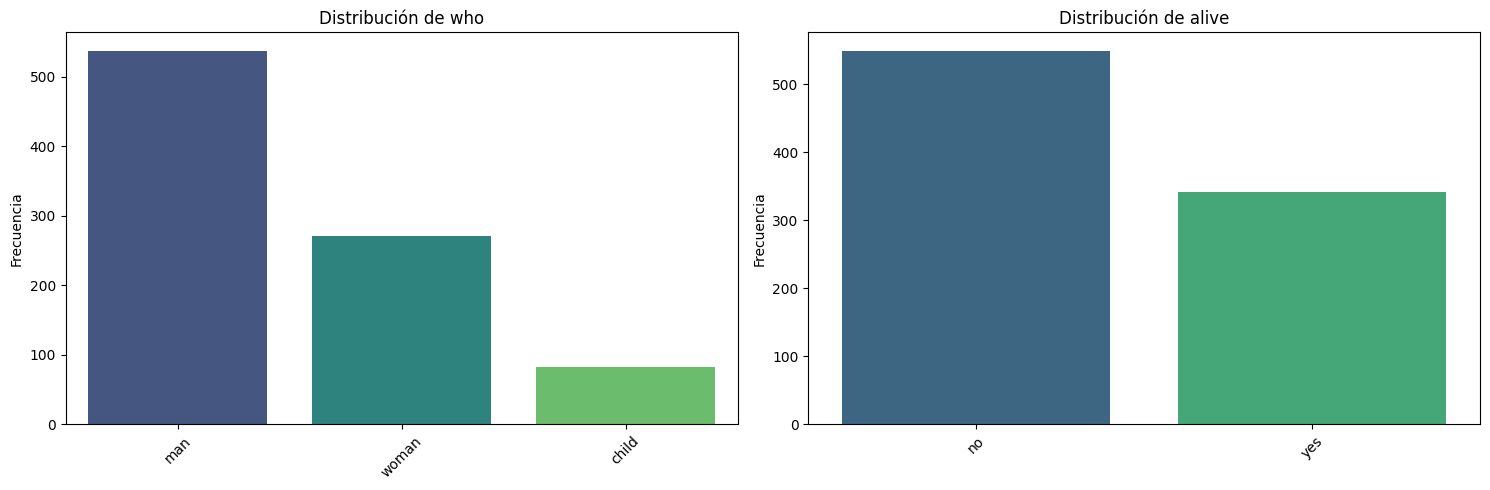

In [41]:
pinta_distribucion_categoricas(df_titanic4, ["who", "alive"])

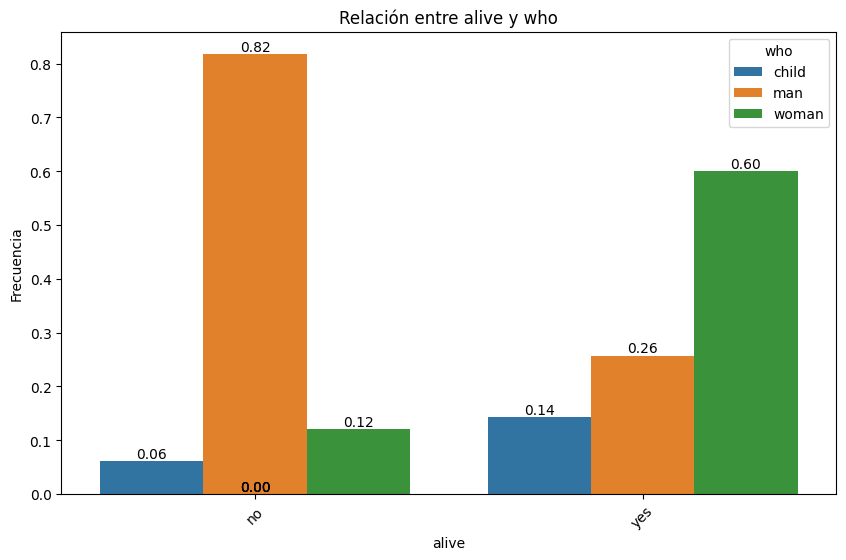

In [45]:
plot_categorical_relationship_fin(df_titanic4, "alive","who",relative_freq = True,show_values= True)

In [ ]:
# Test multivariante
columnas = ["alive","sex","who"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic4[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic4.loc[df_titanic4[col_directora] == valor,[col_2,col_1]]

Respuesta no:


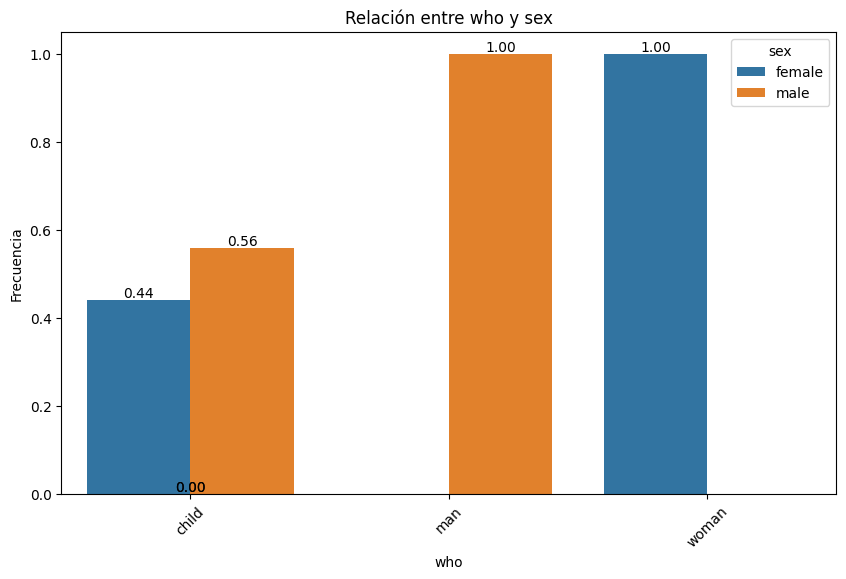

Respuesta yes:


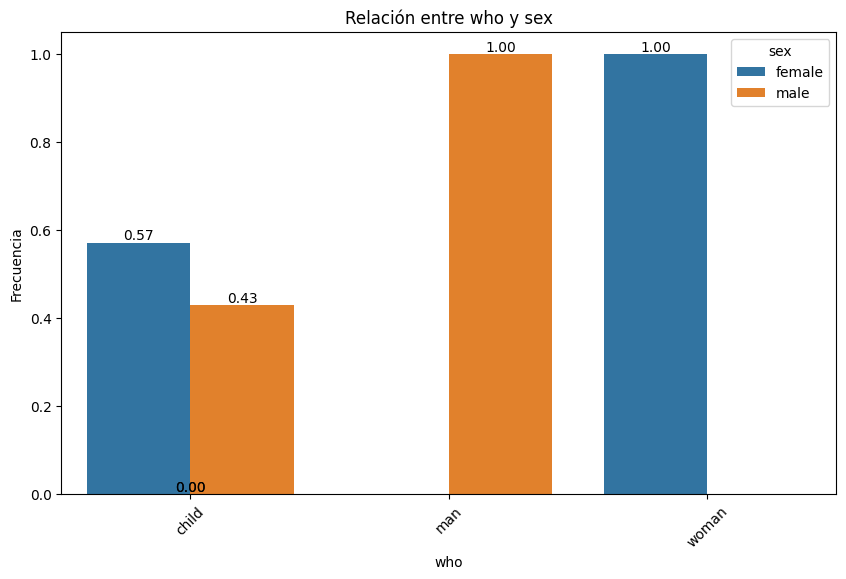

In [50]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

In [53]:
tabla_contingencia_absoluta = pd.crosstab(df_titanic4['alive'], df_titanic4['who'])

tabla_contingencia_absoluta

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [48]:
tabla_contingencia = pd.crosstab(df_titanic4['alive'], df_titanic4['who'], normalize=True)

tabla_contingencia

who,child,man,woman
alive,,,
no,0.038159,0.503928,0.074074
yes,0.054994,0.098765,0.230079


In [54]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_absoluta)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


In [ ]:
# Lo que hemos hecho es observar la distribución de los supervivientes en función de la variable "who".
# Observamos que la mayoría de los supervivientes eran mujeres, seguidas de niños y luego hombres. 
# Esto sugiere que las mujeres y los niños tenían una mayor probabilidad de sobrevivir en comparación con los hombres.
# Y que seguramente hubo una política de "mujeres y niños primero" durante el proceso de evacuación del Titanic.
# Lo hemos confirmado con el test de Chi-cuadrado, ya que el p-valor es muy pequeño (p < 0.05), lo que indica que hay una asociación significativa entre las variables "alive" y "who".

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

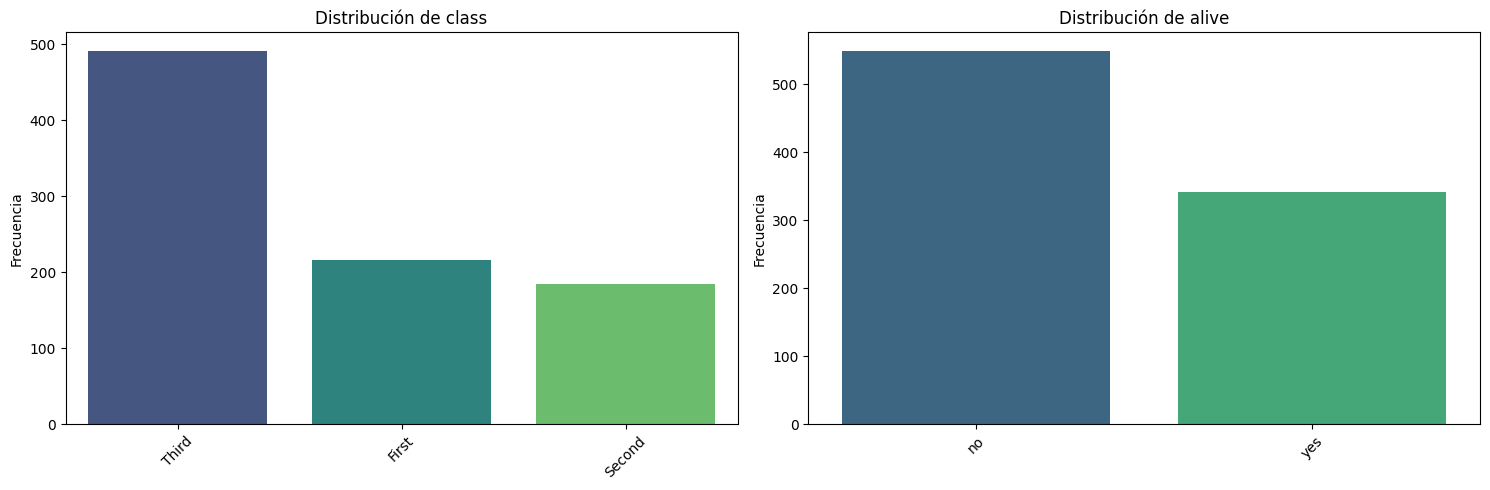

In [55]:
pinta_distribucion_categoricas(df_titanic4, ["class", "alive"])

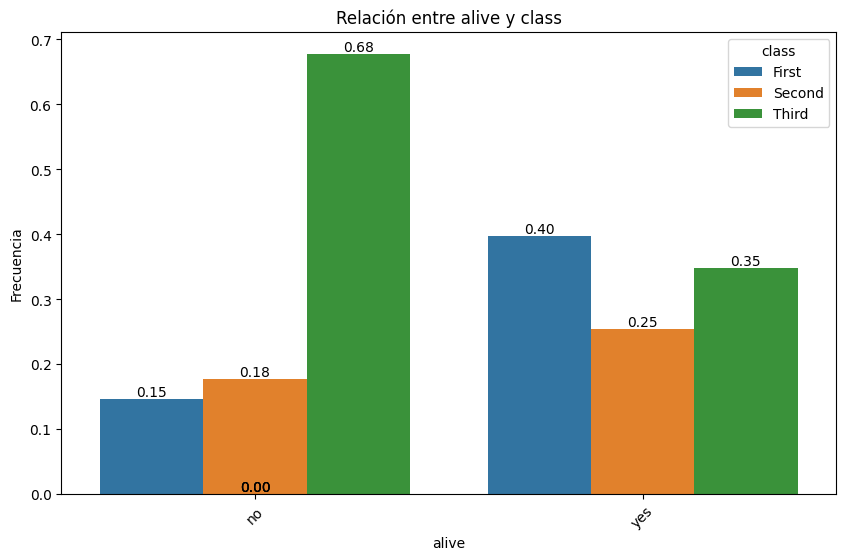

In [56]:
plot_categorical_relationship_fin(df_titanic4, "alive","class",relative_freq = True,show_values= True)

In [57]:
columnas = ["alive","sex","class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic4[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic4.loc[df_titanic4[col_directora] == valor,[col_2,col_1]]

Respuesta no:


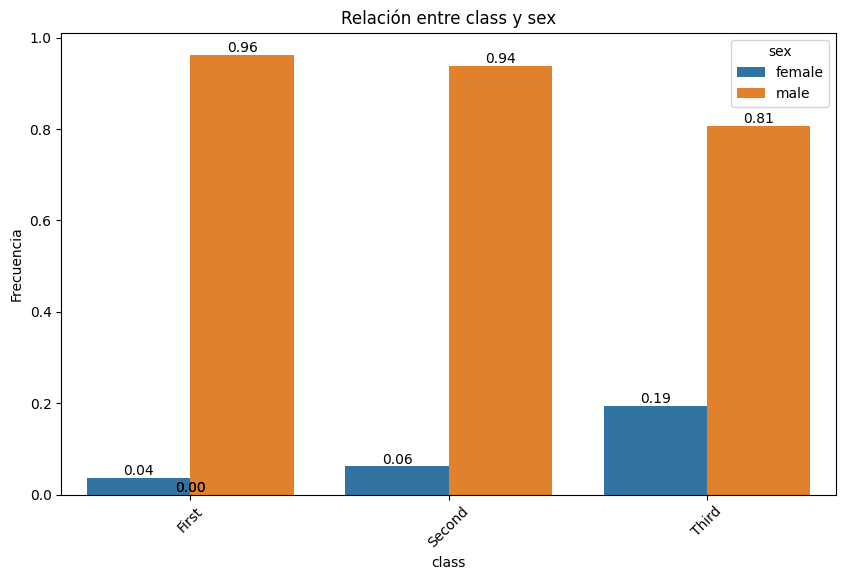

Respuesta yes:


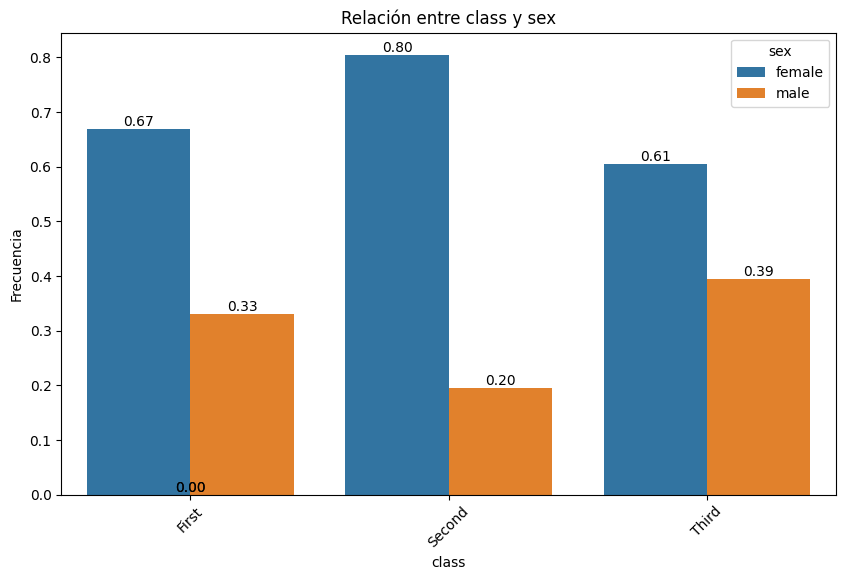

In [58]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

In [61]:
tabla_contingencia_absoluta = pd.crosstab(df_titanic4['alive'], df_titanic4['class'],normalize=True )

tabla_contingencia_absoluta

class,First,Second,Third
alive,,,
no,0.089787,0.108866,0.417508
yes,0.152637,0.097643,0.133558


In [63]:
tabla_contingencia_absoluta = pd.crosstab(df_titanic4['alive'], df_titanic4['class'])

tabla_contingencia_absoluta

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [64]:

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_absoluta)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [ ]:
# AL hacer el test de Chi-cuadrado, obtenemos un p-valor muy pequeño (p < 0.05), lo que indica que hay una asociación significativa entre las variables "alive" y "class".
# Lo que hemos hecho es observar la distribución de los supervivientes en función de la variable "class".
# Observamos que la mayoría de los supervivientes pertenecían a la primera clase, seguidos de la segunda clase y luego de la tercera clase.
# Esto sugiere que los pasajeros de la primera clase tenían una mayor probabilidad de sobrevivir en comparación con los pasajeros de las clases inferiores

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

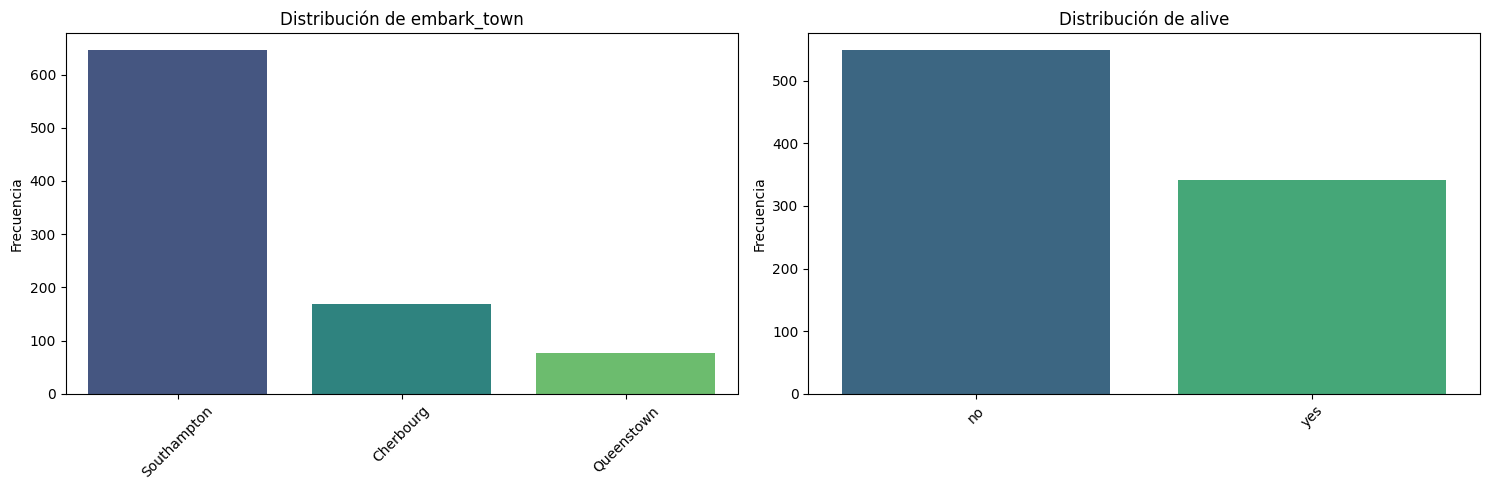

In [66]:
pinta_distribucion_categoricas(df_titanic4, ["embark_town", "alive"])

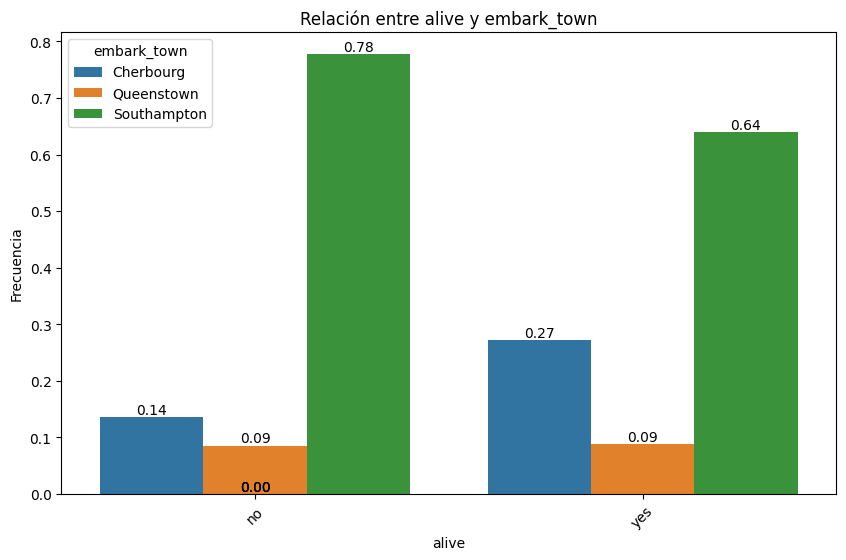

In [67]:
plot_categorical_relationship_fin(df_titanic4, "alive","embark_town",relative_freq = True,show_values= True)

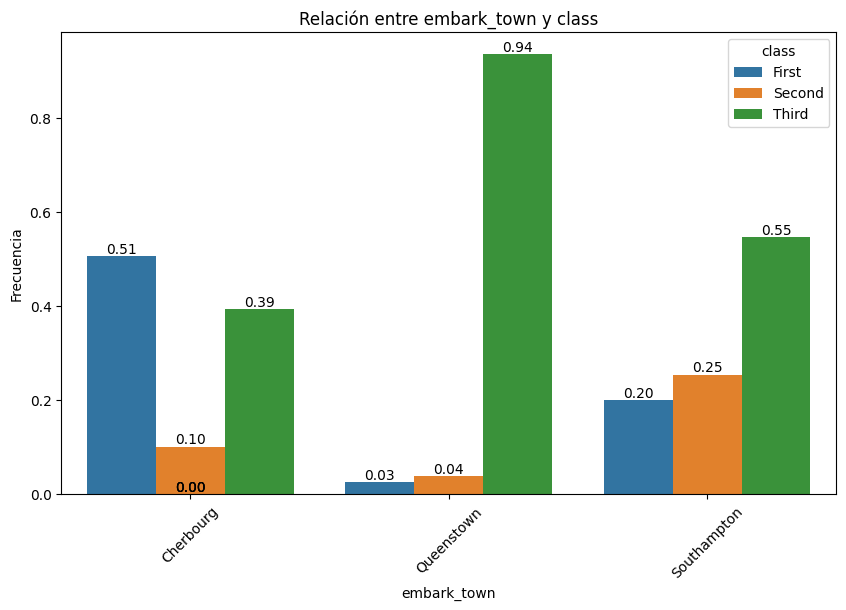

In [68]:
plot_categorical_relationship_fin(df_titanic4, "embark_town","class",relative_freq = True,show_values= True)

In [70]:
columnas = ["alive","embark_town","class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic4[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic4.loc[df_titanic4[col_directora] == valor,[col_2,col_1]]

Respuesta no:


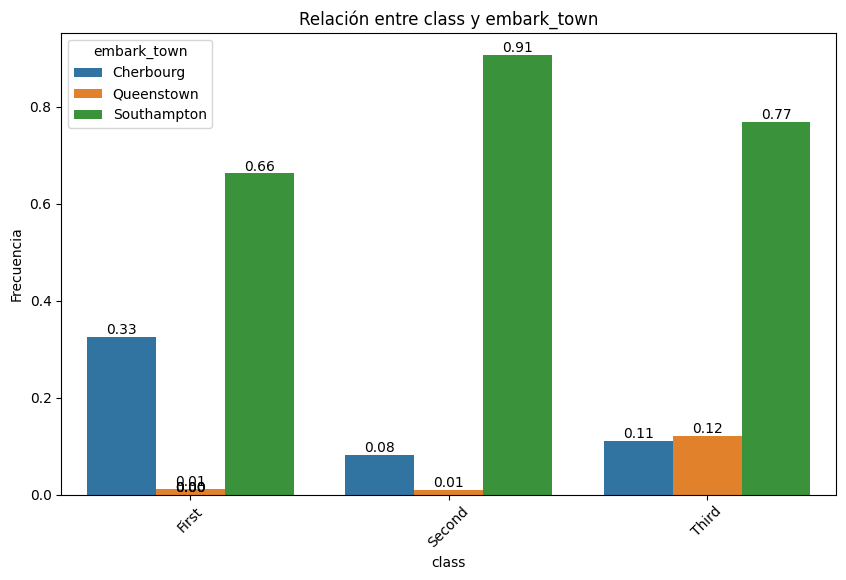

Respuesta yes:


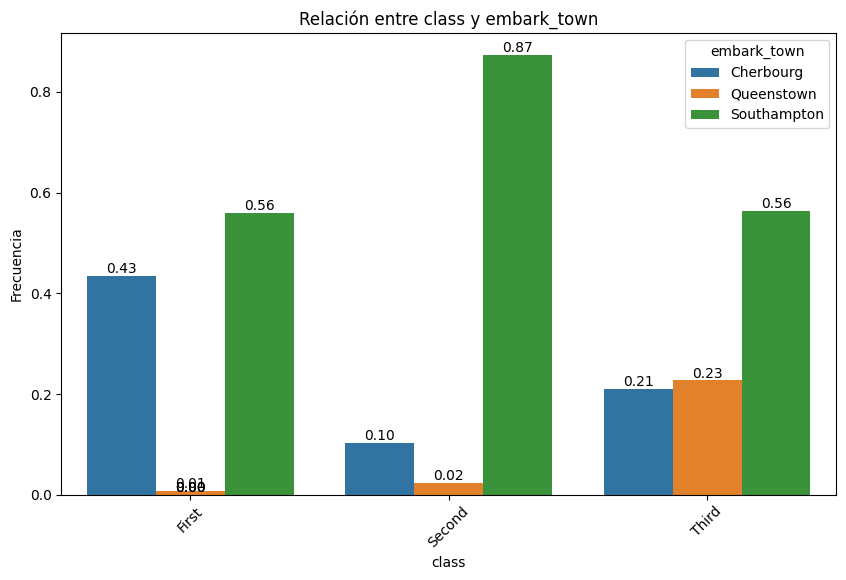

In [71]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

In [ ]:
# Por lo visto de momento, si eras de primera clase, tenías más probabilidades de sobrevivir, y si embarcaste en Cherbourg, también tenías más probabilidades de sobrevivir.


In [74]:
tabla_contingencia_absoluta = pd.crosstab(df_titanic4['alive'], df_titanic4['embark_town'] )

tabla_contingencia_absoluta

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,75,47,427
yes,93,30,219


In [72]:
tabla_contingencia_relativa = pd.crosstab(df_titanic4['alive'], df_titanic4['embark_town'],normalize=True )

tabla_contingencia_relativa

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,0.084175,0.05275,0.479237
yes,0.104377,0.03367,0.245791


In [76]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_absoluta)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


In [ ]:
# Despues de realizar el test de Chi-cuadrado, obtenemos un p-valor muy pequeño (p < 0.05), lo que indica que hay una asociación significativa entre las variables "alive" y "embark_town".
# Habia una gran proabilidad de sobrevivir si embarcaste en Cherbourg, y una menor probabilidad si embarcaste en Southampton o Queenstown.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

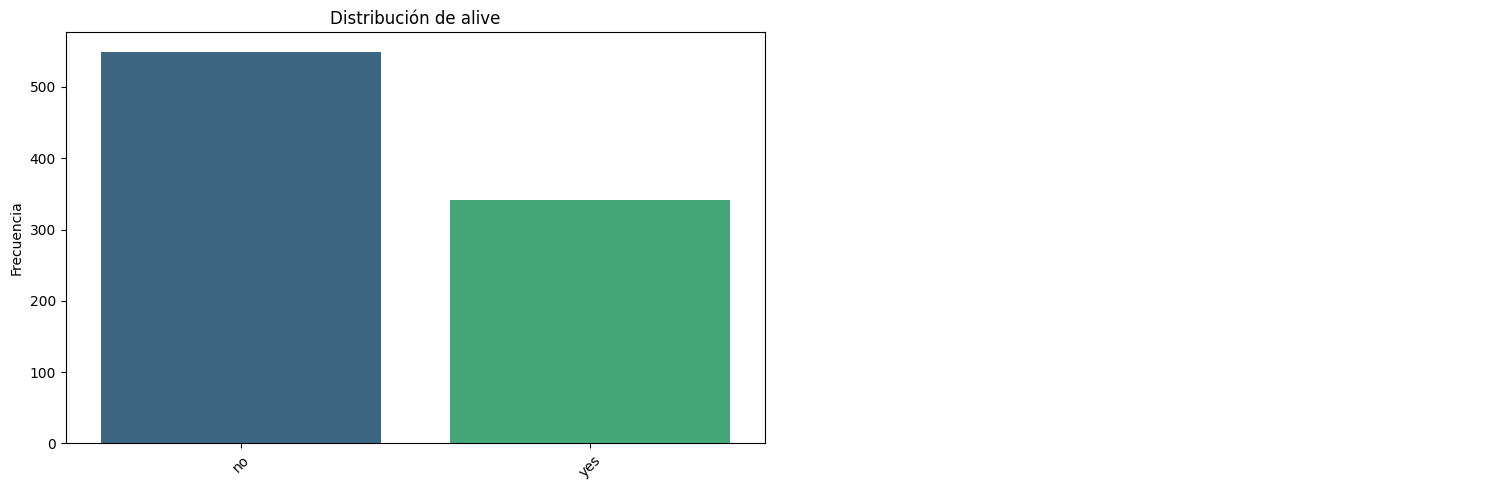

In [79]:
pinta_distribucion_categoricas(df_titanic4, ["alive"])

(2,)


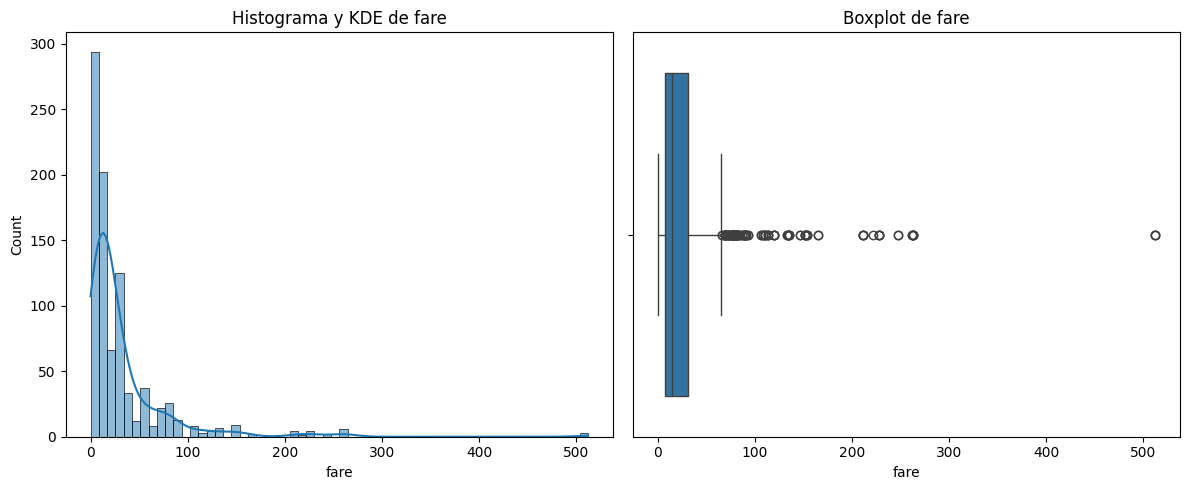

In [80]:
plot_combined_graphs(df_titanic4,["fare"])

In [83]:
Q1 = df_titanic4["fare"].quantile(0.25)
Q3 = df_titanic4["fare"].quantile(0.75)
IQR = Q3 - Q1

In [131]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_titanic4[(df_titanic4["fare"] < lower_bound) | (df_titanic4["fare"] > upper_bound)]
df_titanic4_no_outliers = df_titanic4[(df_titanic4['fare'] >= lower_bound) & (df_titanic4['fare'] <= upper_bound)].copy()



(2,)


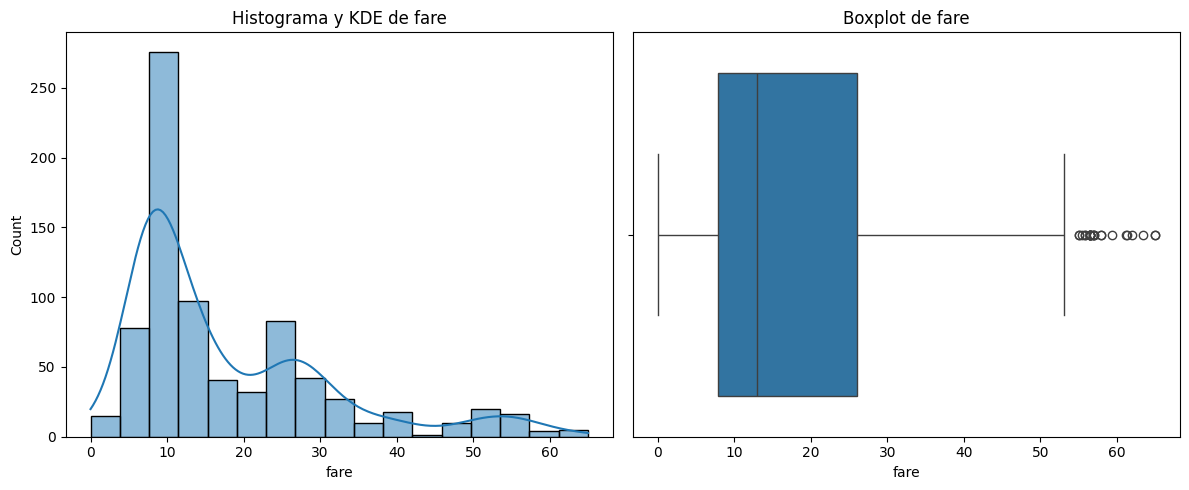

In [89]:
plot_combined_graphs(df_titanic4_no_outliers,["fare"])

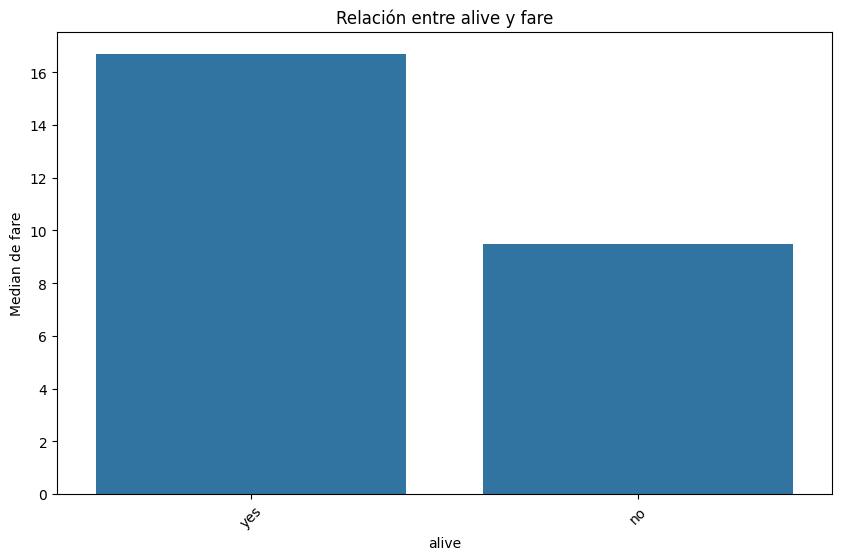

In [90]:
plot_categorical_numerical_relationship(df_titanic4_no_outliers,"alive","fare", measure = "median")

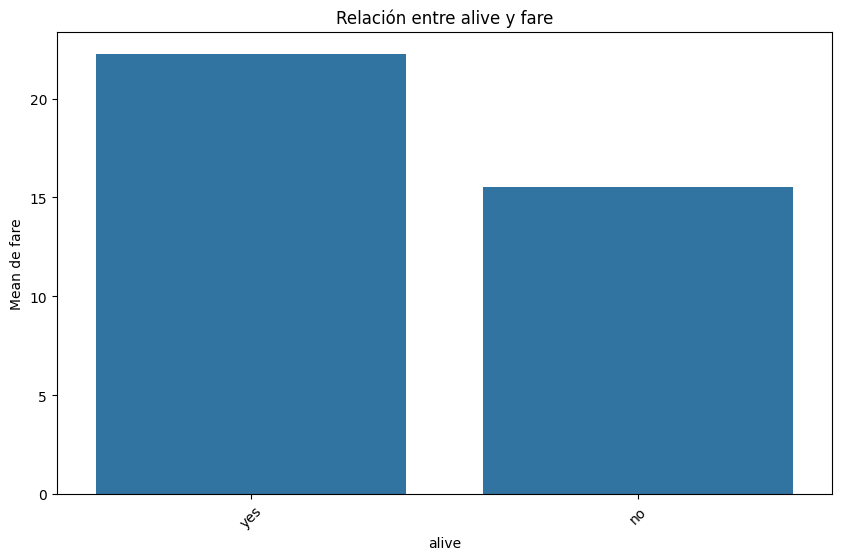

In [91]:
plot_categorical_numerical_relationship(df_titanic4_no_outliers,"alive","fare", measure = "mean")

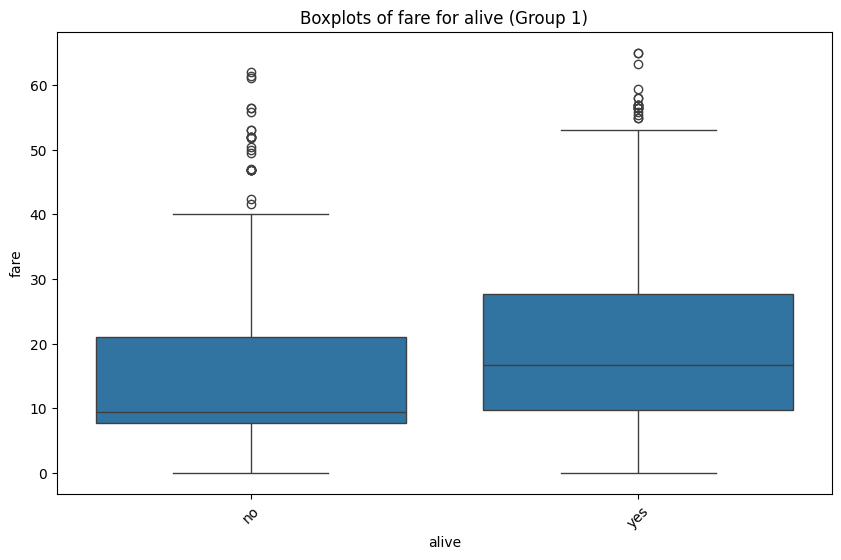

In [93]:
plot_grouped_boxplots(df_titanic4_no_outliers,"alive","fare")


alive = no:


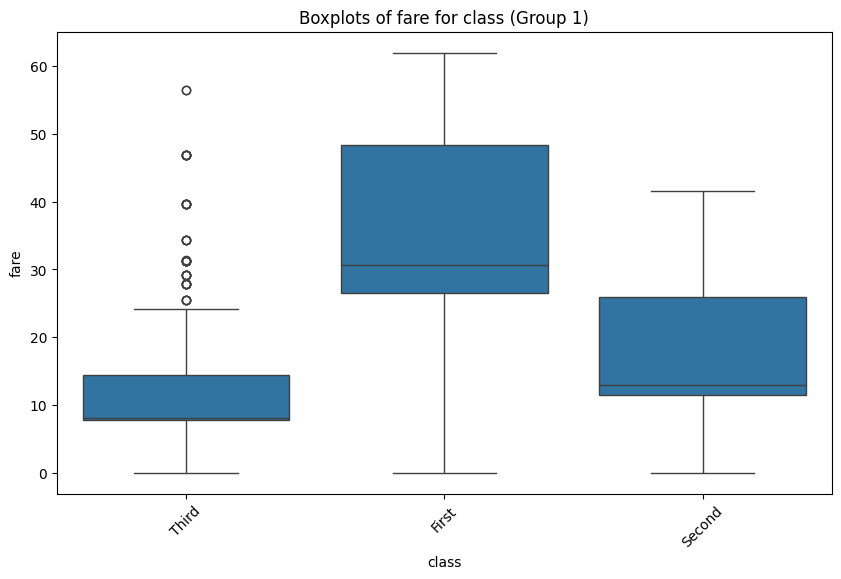


alive = yes:


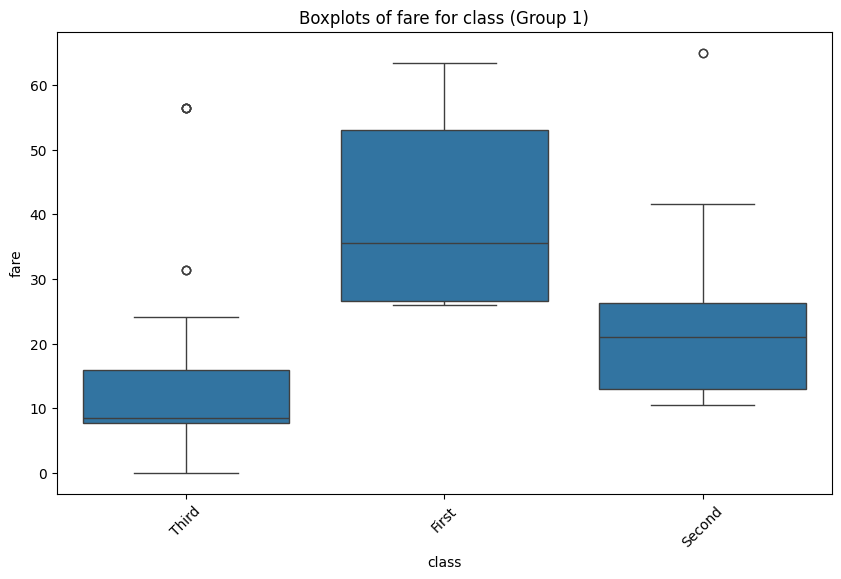

In [94]:
columnas = ["alive", "class", "fare"]
col_directora = "alive"
col_cat = "class"
col_num = "fare"

diccionario_multivariante = {}
for valor in df_titanic4_no_outliers[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic4_no_outliers.loc[df_titanic4_no_outliers[col_directora] == valor]

for valor, df_datos in diccionario_multivariante.items():
    print(f"\n{col_directora} = {valor}:")
    plot_grouped_boxplots(df_datos, col_cat, col_num)

In [ ]:
# Comparar fare por clase y estado de supervivencia
fare_analisis = df_titanic4_no_outliers.groupby(["class", "alive"])["fare"].agg(['mean', 'median', 'count'])
print(fare_analisis)

                   mean   median  count
class  alive                           
First  no     33.527195  30.6958     55
       yes    40.455049  35.5000     57
Second no     16.472780  13.0000     92
       yes    22.055700  21.0000     87
Third  no     12.597681   8.0500    365
       yes    13.694887   8.5167    119


In [ ]:
from scipy.stats import ttest_ind


print("Valores únicos en la columna 'alive':")
print(df_titanic4_no_outliers['alive'].unique())

# Obtener los valores únicos de la columna 'alive'
alive_values = df_titanic4_no_outliers['alive'].dropna().unique()
if len(alive_values) >= 2:
    value_survived = alive_values[0]
    value_died = alive_values[1]
    
    # Separar los datos en dos grupos
    fare_survived = df_titanic4_no_outliers[df_titanic4_no_outliers['alive'] == value_survived]['fare']
    fare_died = df_titanic4_no_outliers[df_titanic4_no_outliers['alive'] == value_died]['fare']
    
    # Realizar la prueba t 
    t_stat, p_value = ttest_ind(fare_survived, fare_died)
    
    print(f"\nT-Statistic: {t_stat}")
    print(f"P-Value: {p_value}")
    print(f"\nMean fare ({value_survived}): {fare_survived.mean():.2f}")
    print(f"Mean fare ({value_died}): {fare_died.mean():.2f}")

Valores únicos en la columna 'alive':
['no' 'yes']

T-Statistic: -6.70442940849985
P-Value: 3.9009317110190936e-11

Mean fare (no): 15.54
Mean fare (yes): 22.26


In [106]:
# Hay una grande diferencia en la media de fare entre los que sobrevivieron y los que no.
# El p-valor es muy pequeño (p < 0.05), lo que indica que la diferencia en las medias es estadísticamente significativa.
# Por lo que podemos concluir que el fare pagado tiene un impacto significativo en la probabilidad de supervivencia en el Titanic.

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [ ]:
# Es normal que haya gente que no haya pagado nada por el pasaje, ya que,por ejemplo, algunos pasajeros podrían haber sido niños pequeños que sus padres pagaron por ellos o que viajaban gratis o con tarifas reducidas.
# Además, algunos pasajeros podrían haber recibido descuentos o promociones especiales que les permitieron viajar sin costo alguno. Sobretodo este siendo el primer (y único) viaje del Titanic.
# Otros que el pasaje fue pagado por un tercero o que viajaban como parte de una tripulación y no tenían que pagar por su pasaje.
# O que un miembro de la familia pagó por ellos


In [114]:
fare_max = df_titanic4.fare.max()
df_titanic4.groupby("alive")["fare"].max()
# El que más pago fue un pasajero que no sobrevivió, pagando 512.3292

alive
no     263.0000
yes    512.3292
Name: fare, dtype: float64

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.


alive = no:



alive = no:


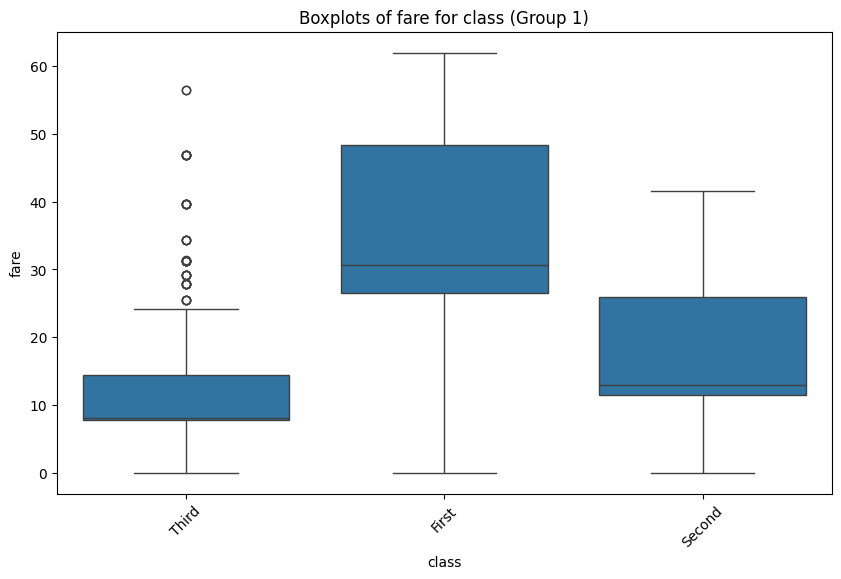


alive = no:


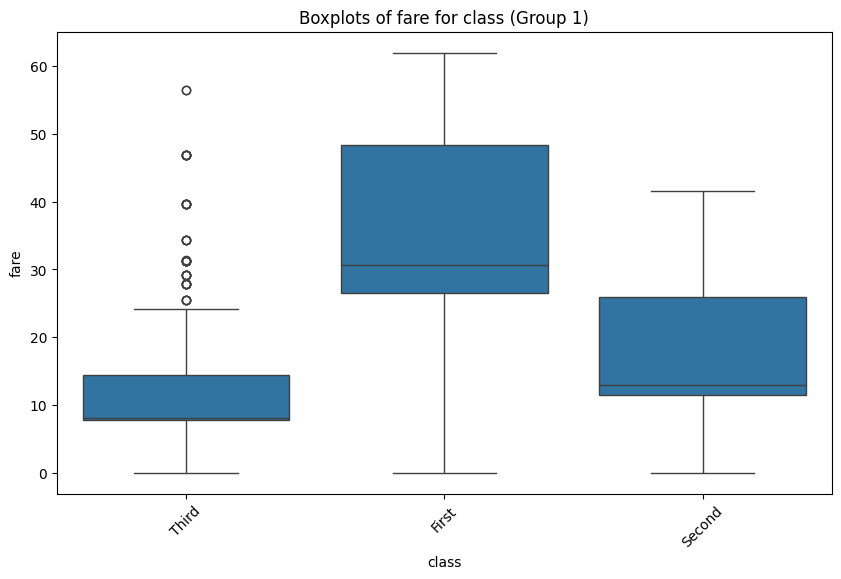


alive = yes:



alive = no:


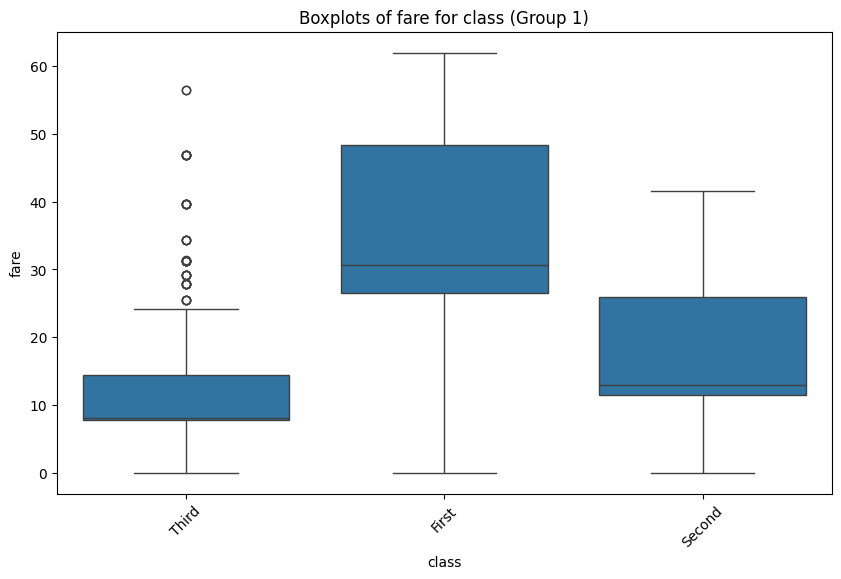


alive = yes:


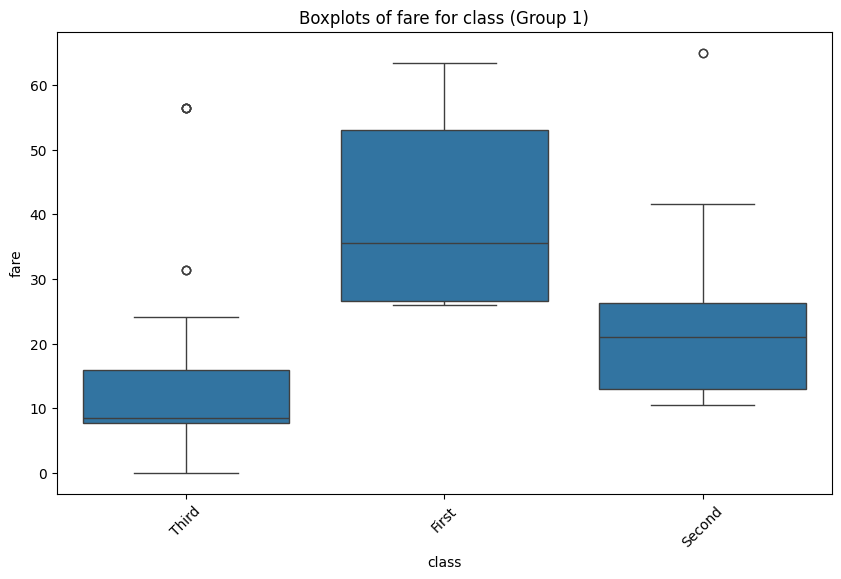

In [107]:
columnas = ["alive", "embark_town", "fare"]
col_directora = "alive"
col_cat = "class"
col_num = "fare"

diccionario_multivariante = {}
for valor in df_titanic4_no_outliers[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic4_no_outliers.loc[df_titanic4_no_outliers[col_directora] == valor]

for valor, df_datos in diccionario_multivariante.items():
    print(f"\n{col_directora} = {valor}:")
    plot_grouped_boxplots(df_datos, col_cat, col_num)

In [108]:
fare_analisis_town = df_titanic4_no_outliers.groupby(["embark_town", "alive"])["fare"].agg(['mean', 'median', 'count'])
print(fare_analisis_town)

                        mean   median  count
embark_town alive                           
Cherbourg   no     18.062764  14.4542     64
            yes    25.989508  19.2583     52
Queenstown  no     11.669293   7.7500     46
            yes    10.533338   7.7875     29
Southampton no     15.584181   9.5000    402
            yes    23.063484  20.3875    182


In [109]:
from scipy.stats import f_oneway

for status in df_titanic4_no_outliers['alive'].unique():
    data_group = df_titanic4_no_outliers[df_titanic4_no_outliers['alive'] == status]
    
    cherbourg = data_group[data_group['embark_town'] == 'Cherbourg']['fare']
    queenstown = data_group[data_group['embark_town'] == 'Queenstown']['fare']
    southampton = data_group[data_group['embark_town'] == 'Southampton']['fare']
    
    f_stat, p_value = f_oneway(cherbourg, queenstown, southampton)
    
    print(f"\nAlive = {status}:")
    print(f"F-Statistic: {f_stat}")
    print(f"P-Value: {p_value}")


Alive = no:
F-Statistic: 3.8260859104829437
P-Value: 0.022424284807477615

Alive = yes:
F-Statistic: 11.221134670728453
P-Value: 2.1167776508989293e-05


In [ ]:
 # Sí, hay una relación significativa entre el dinero pagado, la ciudad de embarque y la probabilidad de supervivencia.
# Al hacer el test de ANOVA, obtenemos p-valores muy pequeños (p < 0.05) para ambos estados de supervivencia, lo que indica que hay diferencias significativas en las medias de fare entre las diferentes ciudades de embarque dentro de cada grupo de supervivencia.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [115]:
fare_analisis_age = df_titanic4_no_outliers.groupby(["class", "alive"])["age"].agg(['mean', 'median', 'count'])
print(fare_analisis_age)

                   mean  median  count
class  alive                          
First  no     43.925886   40.00     55
       yes    36.436239   34.00     57
Second no     34.078390   32.75     92
       yes    26.208922   28.00     87
Third  no     28.232940   30.00    365
       yes    23.978808   27.00    119


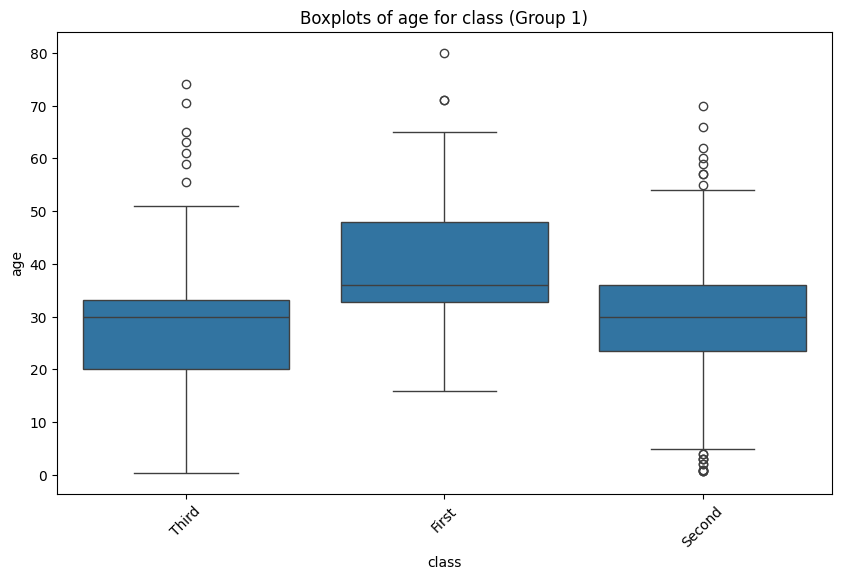

In [116]:
plot_grouped_boxplots(df_titanic4_no_outliers, "class", "age")


alive = no:



alive = no:


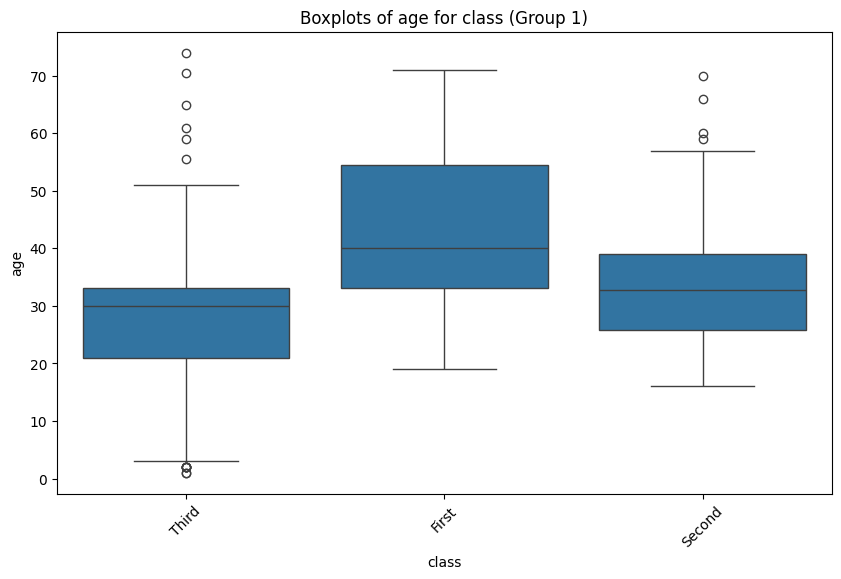


alive = no:


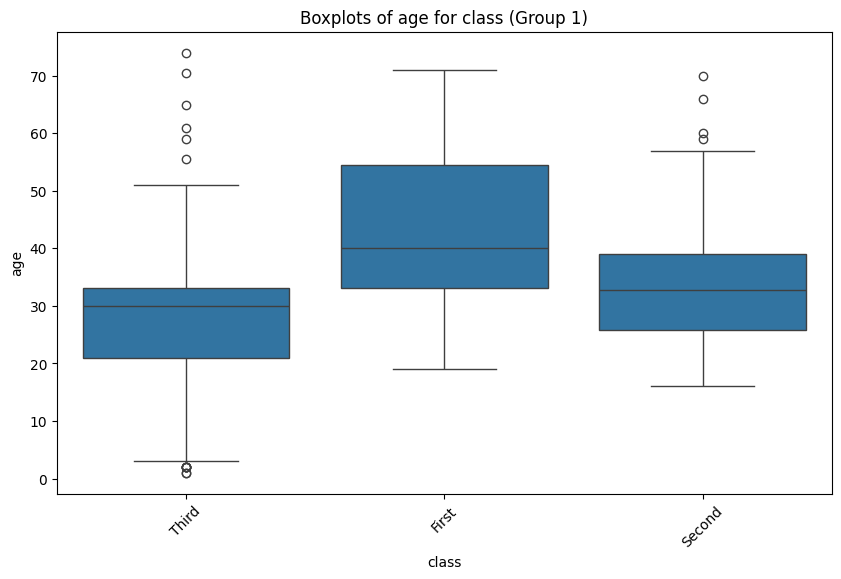


alive = yes:


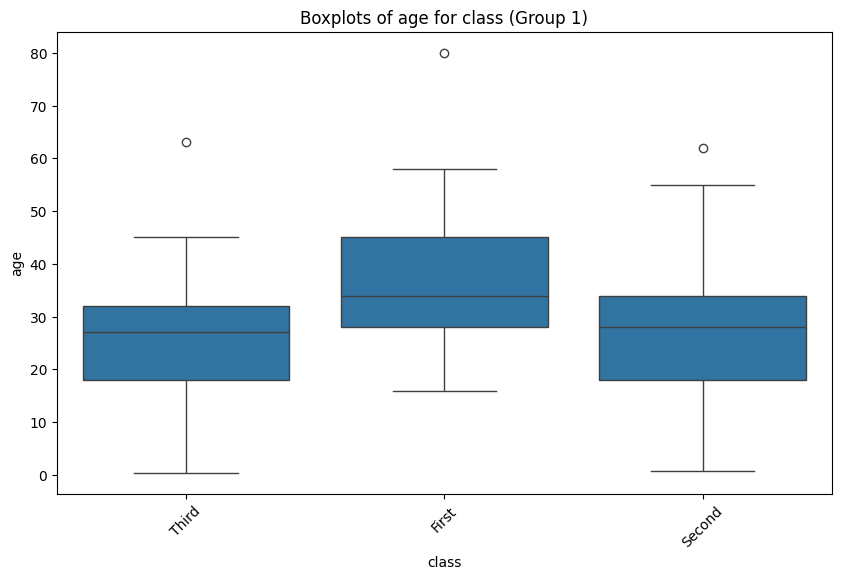

In [117]:
columnas = ["alive", "class", "age"]
col_directora = "alive"
for valor in df_titanic4_no_outliers[col_directora].unique():
    print(f"\nalive = {valor}:")
    plot_grouped_boxplots(df_titanic4_no_outliers[df_titanic4_no_outliers[col_directora] == valor], "class", "age")

In [121]:
df_titanic4_no_outliers.groupby(['class', 'alive']).size().unstack(fill_value=0)

alive,no,yes
class,,
First,55,57
Second,92,87
Third,365,119


8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [ ]:
# Ya tengo dudas sobre este ultimo. Lo veré en la clase grabada

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?